# Figure 07, 08 (NLP 2023.6)

In [1]:
import os
import numpy as np
import pickle

from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

os.chdir('../')
from lib.methods import *
from lib.figure import NLP

os.chdir('../')

## Load data

In [2]:
csv_data_list, _, video_t_data_list = LoadCSVandVIDEOS(
                                                                    csv_path=cfg.CSV_FILE_DIR+cfg.DATA_NAME+cfg.CSV_ADDITIONAL_PATH+'.csv', 
                                                                    data_name_list=['t', 'mic', 'flow'], 
                                                                    sample_span=cfg.SAMPLE_SPAN, 
                                                                    videos_path_list=[
                                                                                    cfg.VIDEO_FILE_DIR+'VF/'+cfg.DATA_NAME+'.avi',
                                                                                    cfg.VIDEO_FILE_DIR+'FVF/'+cfg.DATA_NAME+'.avi',
                                                                                    ]
                                                                    )

flow_data = csv_data_list[2]
video_t_data = video_t_data_list[0]

latent_vector_vf = pickle.load(open(cfg.LV_DIR+cfg.DATA_NAME+'_vf.pkl', 'rb'))
latent_vector_fvf = pickle.load(open(cfg.LV_DIR+cfg.DATA_NAME+'_fvf.pkl', 'rb'))

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic, flow
Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/VF/MRI8_NVF4_10mm_0p0mmVVVV.avi


Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/FVF/MRI8_NVF4_10mm_0p0mmVVVV.avi


## Load modeling data

In [3]:
sindy_vf = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_model_VF.pkl', 'rb'))
bifurcation_data_vf_list_discreted = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_data_VF.pkl', 'rb'))
bifurcation_parameter_vf_list = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_parameter_VF.pkl', 'rb'))

sindy_fvf = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_model_FVF.pkl', 'rb'))
bifurcation_data_fvf_list_discreted = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_data_FVF.pkl', 'rb'))
bifurcation_parameter_fvf_list = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_parameter_FVF.pkl', 'rb'))

## Bifurcation convert

In [4]:
BC_vf = BifurcationConvert(data=latent_vector_vf, parameter_data=flow_data, t_data=video_t_data)
BC_vf.convert(params = cfg.BF_CONVERT_PARAMS)
BC_vf.discretization(params = cfg.BF_DISCRETIZATION_PARAMS_VF)
param_lim = cfg.SINDY_PARAM_LIM
bifurcation_parameter_vf_list = BC_vf.bifurcation_parameter_list[param_lim[0]:param_lim[-1]]
bifurcation_data_vf_list = BC_vf.bifurcation_data_list[param_lim[0]:param_lim[-1]]
bifurcation_t_data_vf_list = BC_vf.bifurcation_t_data_list[param_lim[0]:param_lim[-1]]
bifurcation_data_vf_list_discreted = BC_vf.bifurcation_data_list_discreted[param_lim[0]:param_lim[-1]]
bifurcation_data_vf_list_discreted_index = BC_vf.bifurcation_data_list_discreted_index[param_lim[0]:param_lim[-1]]

BC_fvf = BifurcationConvert(data=latent_vector_fvf, parameter_data=flow_data, t_data=video_t_data)
BC_fvf.convert(params = cfg.BF_CONVERT_PARAMS)
BC_fvf.discretization(params = cfg.BF_DISCRETIZATION_PARAMS_FVF)
param_lim = cfg.SINDY_PARAM_LIM
bifurcation_parameter_fvf_list = BC_fvf.bifurcation_parameter_list[param_lim[0]:param_lim[-1]]
bifurcation_data_fvf_list = BC_fvf.bifurcation_data_list[param_lim[0]:param_lim[-1]]
bifurcation_t_data_fvf_list = BC_fvf.bifurcation_t_data_list[param_lim[0]:param_lim[-1]]
bifurcation_data_fvf_list_discreted = BC_fvf.bifurcation_data_list_discreted[param_lim[0]:param_lim[-1]]
bifurcation_data_fvf_list_discreted_index = BC_fvf.bifurcation_data_list_discreted_index[param_lim[0]:param_lim[-1]]

## Figure

In [37]:
class NLP_p():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]   

    def figure(self,
                 data1_list, data1_parameter_list, 
                 data2,
                 conversion_param=40., 
                 figsize=(25, 5), width_ratios=[1, 1, 0.5], wspace=0.3,
                 title1=None, title2=None, title3=None,
                 marker1='.', marker2='.', marker3='.',
                 c1='b', c2='r', c3='r', 
                 s1=50, s2=50, s3=50,
                 xlim1=(None, None), xlim2=(None, None), xlim3=(None, None),
                 ylim1=(None, None), ylim2=(None, None), ylim3=(None, None),
                 xlabel1=r'$mu $'+'[l/min]', xlabel2=r'$mu $'+'[l/min]', xlabel3=r'$mu $'+'[l/min]', 
                 ylabel1=r'$y_l$', ylabel2=r'$y_l$', ylabel3=r'$y_l$', 
                 panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.14, 1.)], panel_fontsize=40, 
                 save_png=None, save_eps=None,
                 ):
        spec = gridspec.GridSpec(ncols=3, nrows=1,
                                 width_ratios=width_ratios,
                                 wspace=wspace)
        fig = plt.figure(figsize=figsize)

        ax0 = fig.add_subplot(spec[0])
        ax0.set_title(title1, loc='center')
        for i in range(len(data1_list)):  
            ax0.scatter(np.full(data1_list[i].shape, data1_parameter_list[i]*conversion_param), data1_list[i], marker=marker1, c=c1, s=s1)
        ax0.tick_params(labelleft=False, left=False, labelbottom=True, bottom=True)
        ax0.set_xlim(xlim1)
        ax0.set_ylim(ylim1)
        ax0.set_xlabel(xlabel1)
        ax0.set_ylabel(ylabel1)
        fig.text(ax0.get_position().x1-panel_xy_list[0][0], ax0.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax1 = fig.add_subplot(spec[1])
        ax1.set_title(title2, loc='center')
        ax1.scatter(data2[:, 1]*conversion_param, data2[:, 0], marker=marker2, c=c2, s=s2)
        ax1.tick_params(labelleft=False, left=False, labelbottom=True, bottom=True)
        ax1.set_xlim(xlim2)
        ax1.set_ylim(ylim2)
        ax1.set_xlabel(xlabel2)
        ax1.set_ylabel(ylabel2)
        fig.text(ax1.get_position().x1-panel_xy_list[1][0], ax1.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        ax2 = fig.add_subplot(spec[2])
        ax2.set_title(title3, loc='center')
        ax2.scatter(data2[:, 1]*conversion_param, data2[:, 0], marker=marker3, c=c3, s=s3)
        ax2.tick_params(labelleft=False, left=False, labelbottom=True, bottom=True)
        ax2.set_xlim(xlim3)
        ax2.set_ylim(ylim3)
        ax2.set_xlabel(xlabel3)
        ax2.set_ylabel(ylabel3)
        fig.text(ax2.get_position().x1-panel_xy_list[2][0], ax2.get_position().y1-panel_xy_list[2][1], s=panel_list[2], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_png==None:
            plt.show()
        else:
            plt.savefig(save_png+'.png', bbox_inches="tight")
        if save_png==None:
            return
        else:
            plt.savefig(save_eps+'.eps', bbox_inches="tight")

    def figure_(self,
                 data1_list, data1_parameter_list, 
                 data2,
                 conversion_param=40., 
                 figsize=(10, 10), height_ratios=[1, 1], hspace=0.3,
                 title1=None, title2=None,
                 marker1='.', marker2='.',
                 c1='b', c2='r', 
                 s1=50, s2=50,
                 xlim1=(None, None), xlim2=(None, None),
                 ylim1=(None, None), ylim2=(None, None),
                 xlabel1=r'$mu $'+'[l/min]', xlabel2=r'$mu $'+'[l/min]', 
                 ylabel1=r'$y_l$', ylabel2=r'$y_l$', 
                 panel_list = ['(a)', '(b)'], panel_xy_list=[(0.14, 1.), (0.14, 1.)], panel_fontsize=40, 
                 save_png=None, save_eps=None,
                 ):
        spec = gridspec.GridSpec(ncols=1, nrows=2,
                                 height_ratios=height_ratios,
                                 hspace=hspace)
        fig = plt.figure(figsize=figsize)

        ax0 = fig.add_subplot(spec[0])
        ax0.set_title(title1, loc='left')
        for i in range(len(data1_list)):  
            ax0.scatter(np.full(data1_list[i].shape, data1_parameter_list[i]*conversion_param), data1_list[i], marker=marker1, c=c1, s=s1)
        ax0.tick_params(labelleft=False, left=False, labelbottom=True, bottom=True)
        ax0.set_xlim(xlim1)
        ax0.set_ylim(ylim1)
        ax0.set_xlabel(xlabel1)
        ax0.set_ylabel(ylabel1)
        fig.text(ax0.get_position().x1-panel_xy_list[0][0], ax0.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax1 = fig.add_subplot(spec[1])
        ax1.set_title(title2, loc='left')
        ax1.scatter(data2[:, 1]*conversion_param, data2[:, 0], marker=marker2, c=c2, s=s2)
        ax1.tick_params(labelleft=False, left=False, labelbottom=True, bottom=True)
        ax1.set_xlim(xlim2)
        ax1.set_ylim(ylim2)
        ax1.set_xlabel(xlabel2)
        ax1.set_ylabel(ylabel2)
        fig.text(ax1.get_position().x1-panel_xy_list[1][0], ax1.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_png==None:
            plt.show()
        else:
            plt.savefig(save_png+'.png', bbox_inches="tight")
        if save_png==None:
            return
        else:
            plt.savefig(save_eps+'.eps', bbox_inches="tight")

[ SINDy params ]
order     | 7
threshold | 0.1
alpha     | 0.1
------------------------------
[ SINDy model ]
(x)[k+1] = -410557.478 1 + 17088.770 x[k] + 3384244.283 mu[k] + -12172486.441 mu[k]^2 + -1345.228 x[k]^3 + -90908.922 x[k]^2 mu[k] + 15561.495 x[k] mu[k]^2 + 24372881.167 mu[k]^3 + 392.932 x[k]^4 + 439370.090 x[k]^2 mu[k]^2 + -618774.035 x[k] mu[k]^3 + -28929011.386 mu[k]^4 + -761198.661 x[k]^2 mu[k]^3 + 1515028.084 x[k] mu[k]^4 + 20116537.926 mu[k]^5 + -51.768 x[k]^6 + 411.886 x[k]^4 mu[k]^2 + 574807.060 x[k]^2 mu[k]^4 + -1342175.779 x[k] mu[k]^5 + -7506014.110 mu[k]^6 + -31.212 x[k]^7 + 380.280 x[k]^6 mu[k] + -1434.135 x[k]^5 mu[k]^2 + 2553.151 x[k]^4 mu[k]^3 + -3202.010 x[k]^3 mu[k]^4 + -158509.420 x[k]^2 mu[k]^5 + 411777.958 x[k] mu[k]^6 + 1144666.878 mu[k]^7
(mu)[k+1] = 1.000 mu[k]


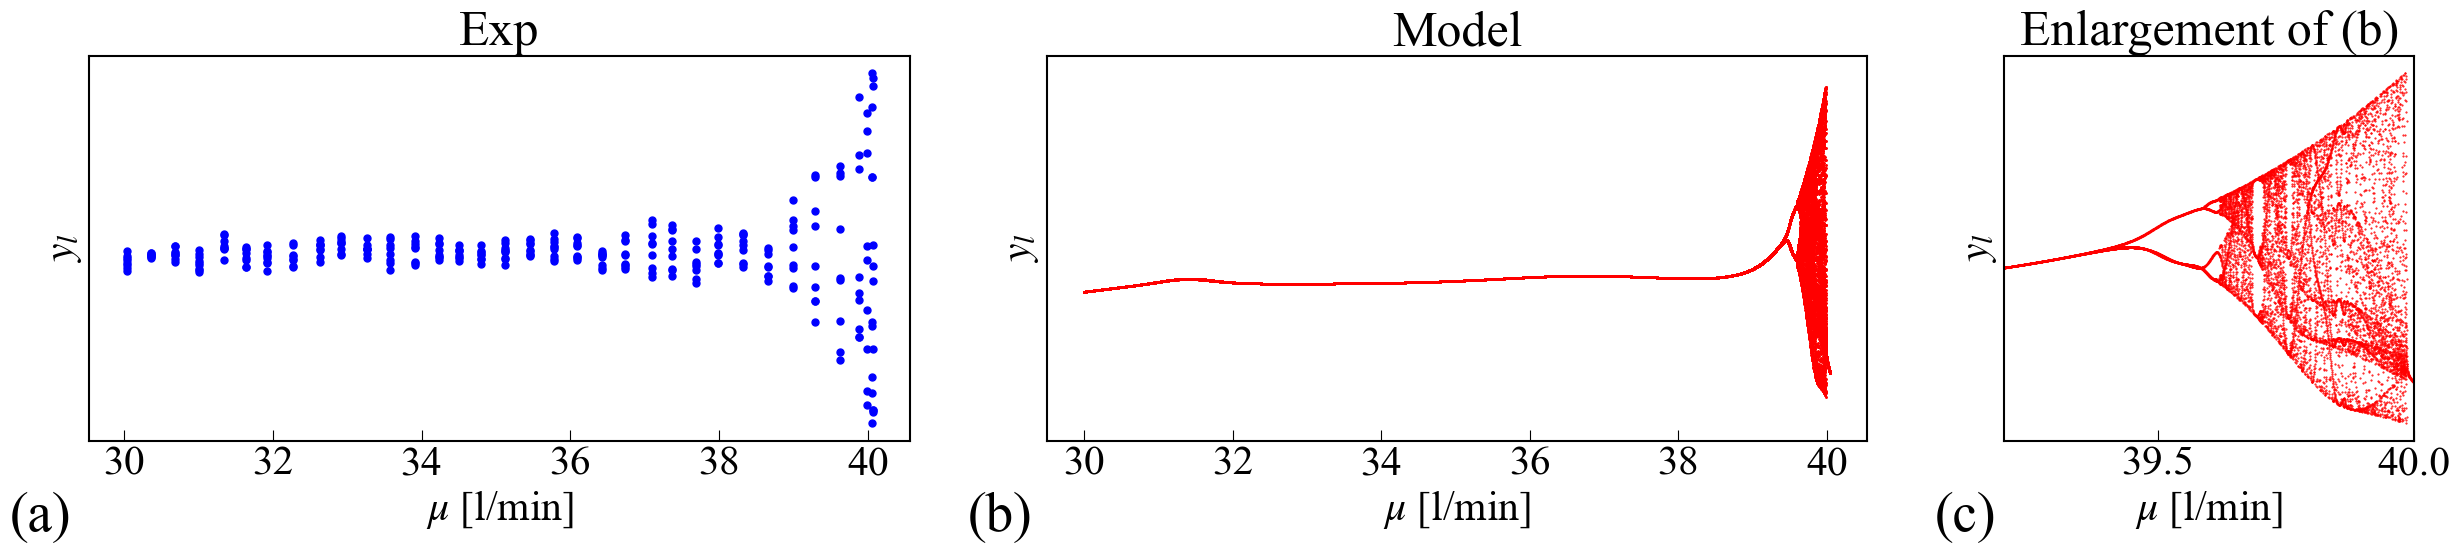

[ SINDy params ]
order     | 7
threshold | 0.1
alpha     | 0.1
------------------------------
[ SINDy model ]
(x)[k+1] = -7042.343 1 + 18501.215 mu[k] + 25050.758 x[k] mu[k] + 21580.008 mu[k]^2 + -1341.137 x[k]^2 mu[k] + -142042.996 x[k] mu[k]^2 + -113022.404 mu[k]^3 + 8986.550 x[k]^2 mu[k]^2 + 311822.260 x[k] mu[k]^3 + 112228.828 mu[k]^4 + 406.118 x[k]^4 mu[k] + -3718.589 x[k]^3 mu[k]^2 + -8935.913 x[k]^2 mu[k]^3 + -344148.055 x[k] mu[k]^4 + -240.118 x[k]^6 + 1486.433 x[k]^5 mu[k] + -3759.504 x[k]^4 mu[k]^2 + 8369.407 x[k]^3 mu[k]^3 + 191331.678 x[k] mu[k]^5 + -52739.340 mu[k]^6 + 54.682 x[k]^7 + -206.782 x[k]^6 mu[k] + 774.576 x[k]^4 mu[k]^3 + -2170.503 x[k]^3 mu[k]^4 + -41692.613 x[k] mu[k]^6 + 20469.605 mu[k]^7
(mu)[k+1] = 1.000 mu[k]


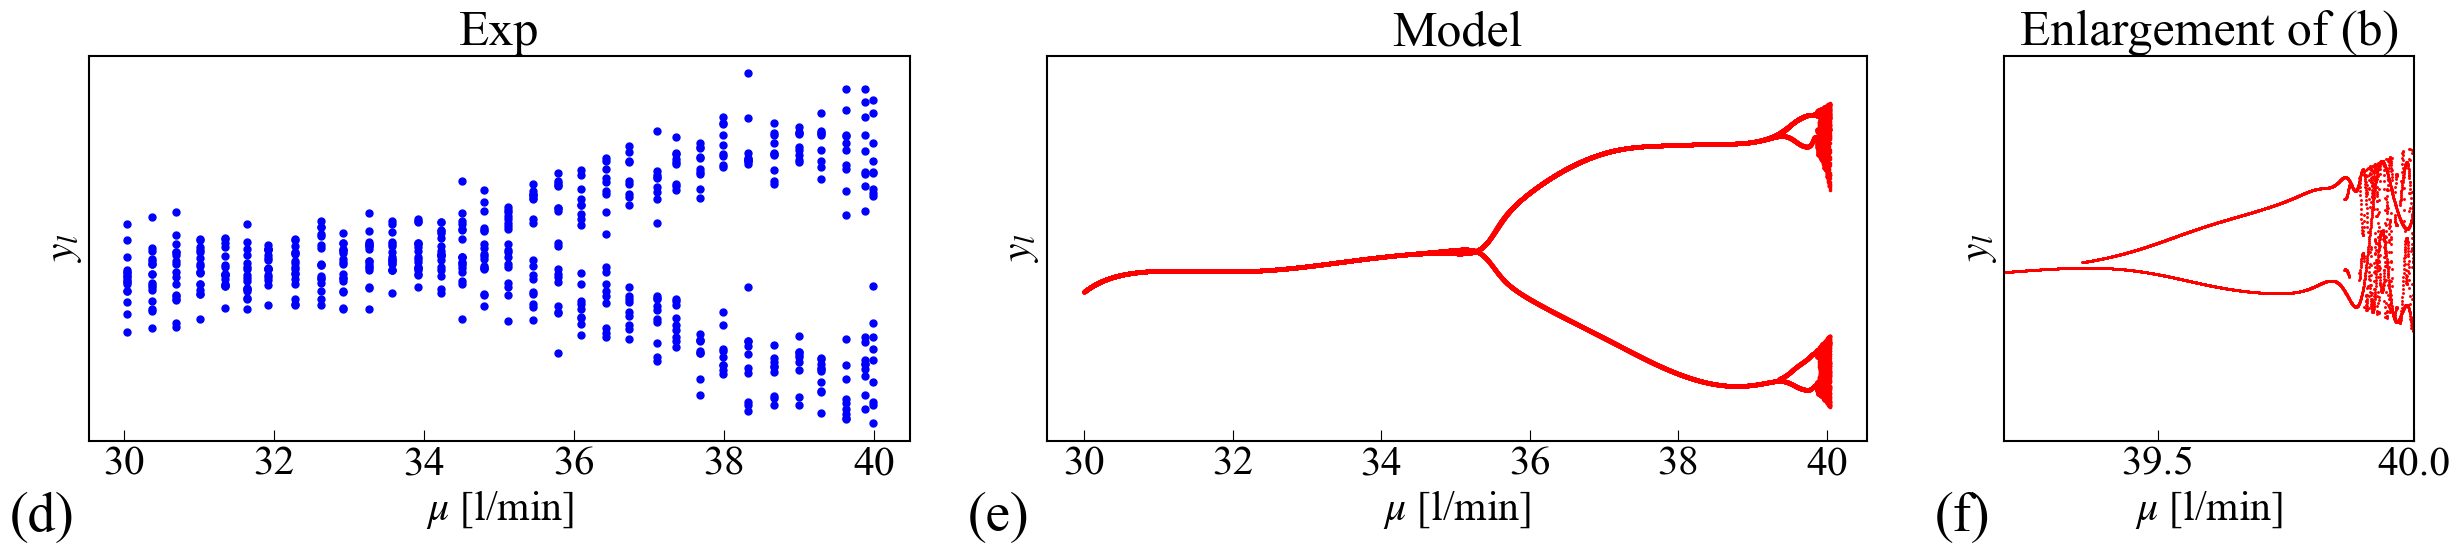

In [38]:
fig = NLP_p({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            'xtick.direction':'in',
            'ytick.direction':'in',
            'axes.linewidth':1.5,
            'xtick.major.size':8,
            'ytick.major.size':8,
            })

sindy_vf.print_model()

fig.figure(data1_list=bifurcation_data_vf_list_discreted, data1_parameter_list=bifurcation_parameter_vf_list, 
            data2=sindy_vf.freerun_test_X,
            figsize=(30, 5), width_ratios=[1, 1, 0.5], wspace=0.2,
            title1='Exp', title2='Model', title3='Enlargement of (b)',
            marker1='.', marker2='.', marker3='.',
            c1='b', c2='r', c3='r', 
            s1=100, s2=5, s3=1,
            xlim1=(None, None), xlim2=(None, None), xlim3=(39.2, 40.00),
            ylim1=(None, None), ylim2=(0.9, 2.4), ylim3=(None, None),
            xlabel1=r'$\mu$'+' [l/min]', xlabel2=r'$\mu$'+' [l/min]', xlabel3=r'$\mu$'+' [l/min]', 
            ylabel1=r'$y_l$', ylabel2=r'$y_l$', ylabel3=r'$y_l$', 
            panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.3, 0.95), (0.3, 0.95), (0.16, 0.95)], panel_fontsize=40, 
            save_png=None, save_eps=None)

sindy_fvf.print_model()

fig.figure(data1_list=bifurcation_data_fvf_list_discreted[:-2], data1_parameter_list=bifurcation_parameter_fvf_list[:-2], 
            data2=sindy_fvf.freerun_test_X,
            figsize=(30, 5), width_ratios=[1, 1, 0.5], wspace=0.2,
            title1='Exp', title2='Model', title3='Enlargement of (b)',
            marker1='.', marker2='.', marker3='.',
            c1='b', c2='r', c3='r', 
            s1=100, s2=10, s3=5,
            xlim1=(None, None), xlim2=(None, None), xlim3=(39.2, 40.00),
            ylim1=(None, None), ylim2=(0.7, 2.0), ylim3=(0.7, 1.15),
            xlabel1=r'$\mu$'+' [l/min]', xlabel2=r'$\mu$'+' [l/min]', xlabel3=r'$\mu$'+' [l/min]', 
            ylabel1=r'$y_l$', ylabel2=r'$y_l$', ylabel3=r'$y_l$', 
            panel_list = ['(d)', '(e)', '(f)'], panel_xy_list=[(0.3, 0.95), (0.3, 0.95), (0.16, 0.95)], panel_fontsize=40, 
            save_png=None, save_eps=None)

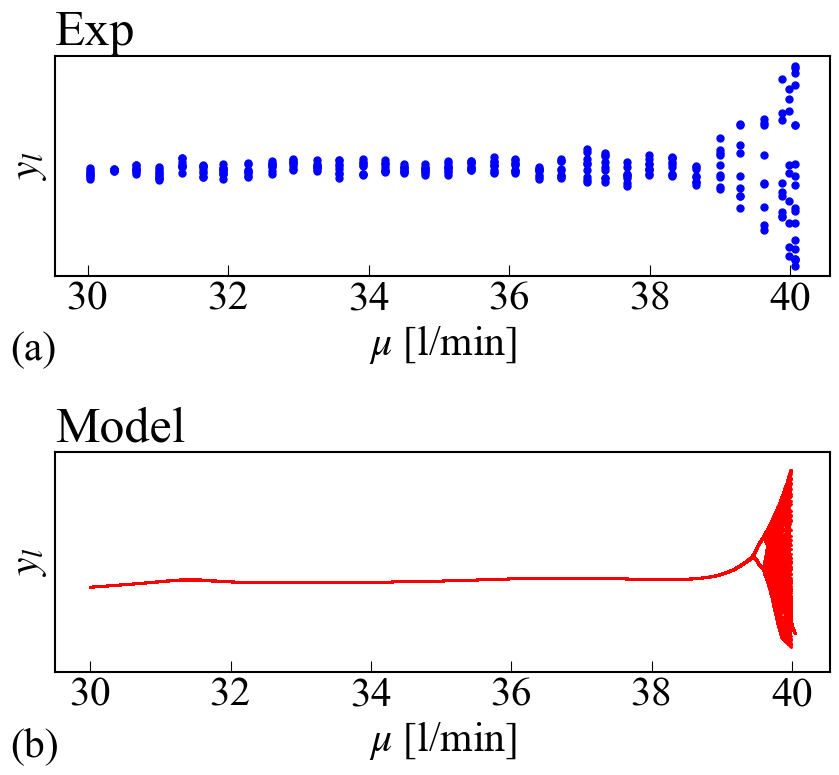

In [43]:
fig.figure_(data1_list=bifurcation_data_vf_list_discreted, data1_parameter_list=bifurcation_parameter_vf_list, 
            data2=sindy_vf.freerun_test_X,
            figsize=(10, 8), height_ratios=[1, 1], hspace=0.8,
            title1='Exp', title2='Model',
            marker1='.', marker2='.',
            c1='b', c2='r', 
            s1=100, s2=5,
            xlim1=(None, None), xlim2=(None, None),
            ylim1=(None, None), ylim2=(0.9, 2.4),
            xlabel1=r'$\mu$'+' [l/min]', xlabel2=r'$\mu$'+' [l/min]', 
            ylabel1=r'$y_l$', ylabel2=r'$y_l$', 
            panel_list = ['(a)', '(b)'], panel_xy_list=[(0.82, 0.38), (0.82, 0.38)], panel_fontsize=30, 
            save_png=None, save_eps=None)